In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from ts_disaggreg.utils import SineSignalGenerator, SquareSignalGenerator
import random

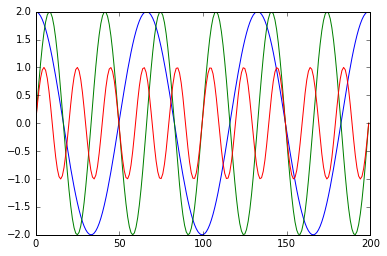

In [2]:
sine_gen = SineSignalGenerator(A_range=[2, 1],
                               f_range=[3, 6, 10], 
                               p_range=[0, 90, 180])
start = 0
end = 1
samples_sec = 200
signals_number = 3
signals = sine_gen.generate_random_signals(start, end, samples_sec, signals_number)
plt.plot(signals.T)
plt.show()

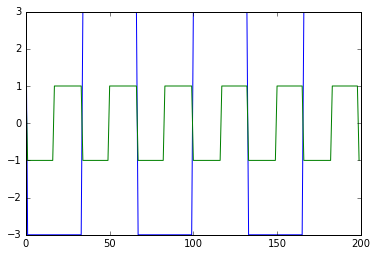

In [19]:
sine_gen = SquareSignalGenerator(A_range=[3, 1],
                               f_range=[3, 6], 
                               p_range=[0, 180])
start = 0
end = 1
samples_sec = 200
signals_number = 2
signals = sine_gen.generate_random_signals(start, end, samples_sec, signals_number)
plt.plot(signals.T)
plt.show()

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from ts_disaggreg.utils import SineSignalGenerator, SquareSignalGenerator
import random

start = 0
end = 1
samples_sec = 200
signals_number = 1000
sine_gen = SineSignalGenerator(A_range=[2, 1],
                               f_range=[3, 10], 
                               p_range=[0, 90, 180])
sine_signals = sine_gen.generate_random_signals(start, end, samples_sec, signals_number)

square_gen = SquareSignalGenerator(A_range=[3, 1],
                                   f_range=[3, 6], 
                                   p_range=[0, 90, 180])
square_signals = square_gen.generate_random_signals(start, end, samples_sec, signals_number)
sine_signals = np.expand_dims(sine_signals, axis=2)
square_signals = np.expand_dims(square_signals, axis=2)
target_signals = np.concatenate((sine_signals, square_signals), axis=2)
print target_signals.shape
input_signals = np.sum(target_signals, axis=2, keepdims=True)
print input_signals.shape

train_frac = 0.8
train_inputs = input_signals[:int(train_frac * signals_number), :, :]
print train_inputs.shape
train_targets = target_signals[:int(train_frac * signals_number), :, :]
print train_targets.shape
test_inputs = input_signals[int(train_frac * signals_number):, :, :]
print test_inputs.shape
test_targets = target_signals[int(train_frac * signals_number):, :, :]
print test_targets.shape

(1000, 200, 2)
(1000, 200, 1)


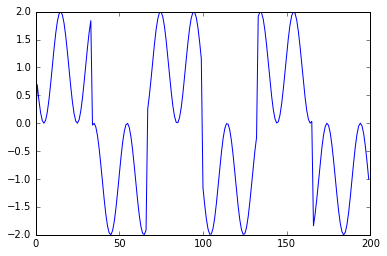

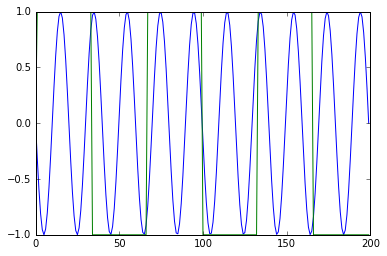

In [4]:
plt.plot(input_signals[10,:,:])
plt.show()
plt.figure()
plt.plot(target_signals[10,:,:])
plt.show()

In [5]:
train_frac = 0.8
train_inputs = input_signals[:int(train_frac * signals_number), :, :]
print train_inputs.shape
train_targets = target_signals[:int(train_frac * signals_number), :, :]
print train_targets.shape
test_inputs = input_signals[int(train_frac * signals_number):, :, :]
print test_inputs.shape
test_targets = target_signals[int(train_frac * signals_number):, :, :]
print test_targets.shape

(800, 200, 1)
(800, 200, 2)
(200, 200, 1)
(200, 200, 2)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from ts_disaggreg.utils import SineSignalGenerator, SquareSignalGenerator
import random

import tensorflow as tf

tf.reset_default_graph()


start = 0
end = 1
samples_sec = 200
signals_number = 1000
sine_gen = SineSignalGenerator(A_range=[2, 1],
                               f_range=[3, 10], 
                               p_range=[0, 90, 180])
sine_signals = sine_gen.generate_random_signals(start, end, samples_sec, signals_number)

square_gen = SquareSignalGenerator(A_range=[3, 1],
                                   f_range=[3, 6], 
                                   p_range=[0, 90, 180])
square_signals = square_gen.generate_random_signals(start, end, samples_sec, signals_number)
sine_signals = np.expand_dims(sine_signals, axis=2)
square_signals = np.expand_dims(square_signals, axis=2)
target_signals = np.concatenate((sine_signals, square_signals), axis=2)
print target_signals.shape
input_signals = np.sum(target_signals, axis=2, keepdims=True)
print input_signals.shape

train_frac = 0.8
train_inputs = input_signals[:int(train_frac * signals_number), :, :]
print train_inputs.shape
train_targets = target_signals[:int(train_frac * signals_number), :, :]
print train_targets.shape
test_inputs = input_signals[int(train_frac * signals_number):, :, :]
print test_inputs.shape
test_targets = target_signals[int(train_frac * signals_number):, :, :]
print test_targets.shape

(1000, 200, 2)
(1000, 200, 1)
(800, 200, 1)
(800, 200, 2)
(200, 200, 1)
(200, 200, 2)


In [6]:
from ts_disaggreg import LstmDisaggregator
dissaggregator = LstmDisaggregator(max_iterations=1000)
dissaggregator.fit(train_inputs, train_targets)

using the test data as validation set
(20, 200, 1)
(20, 200, 2)
Train with approximately 25 epochs
At 0 out of 1000 train cost is 557.887 and val acc is 530.376
At 100 out of 1000 train cost is 47.292 and val acc is 50.721
At 200 out of 1000 train cost is 15.879 and val acc is 16.722
At 300 out of 1000 train cost is 13.952 and val acc is 11.802
At 400 out of 1000 train cost is 10.193 and val acc is 11.515
At 500 out of 1000 train cost is 12.849 and val acc is 11.207
At 600 out of 1000 train cost is 11.231 and val acc is 12.474
At 700 out of 1000 train cost is 7.350 and val acc is 8.286
At 800 out of 1000 train cost is 7.003 and val acc is 8.196
At 900 out of 1000 train cost is 9.766 and val acc is 9.176


In [7]:
predictions = dissaggregator.predict(test_inputs)


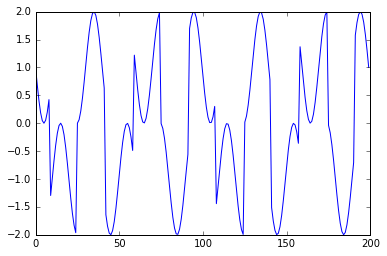

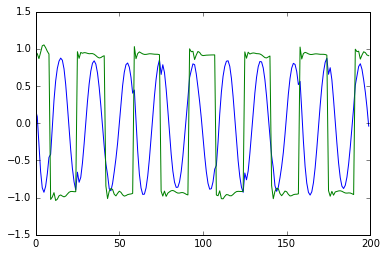

In [10]:
plt.plot(test_inputs[100,:,:])
plt.show()
plt.figure()
plt.plot(predictions[100,:,:])
plt.show()